<a href="https://colab.research.google.com/github/Raphael-Blaize/Financial-inclusion-in-Africa-Kenya-Rwanda-Tanzania-and-Uganda-/blob/main/Financial_inclusion_in_Africa(Kenya%2C_Rwanda%2C_Tanzania%2C_and_Uganda_)_Inclusion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PROBLEM DEFINATION**

Financial Inclusion remains one of the main obstacles to economic and human development in Africa. For example, across Kenya, Rwanda, Tanzania, and Uganda only 9.1 million adults (or 13.9% of the adult population) have access to or use a commercial bank account.

Traditionally, access to bank accounts has been regarded as an indicator of financial inclusion. Despite the proliferation of mobile money in Africa and the growth of innovative fintech solutions, banks still play a pivotal role in facilitating access to financial services. Access to bank accounts enables households to save and facilitate payments while also helping businesses build up their credit-worthiness and improve their access to other financial services. Therefore, access to bank accounts is an essential contributor to long-term economic growth.

The research problem is to figure out how we can predict which individuals are most likely to have or use a bank account. Your solution will help provide an indication of the state of financial inclusion in Kenya, Rwanda, Tanzania, and Uganda, while providing insights into some of the key demographic factors that might drive individuals’ financial outcomes.


# **DATASETS USED IN THIS ANALYSIS**

DATASET FILES:
1.   Variable Definitions: http://bit.ly/VariableDefinitions 
2.   Dataset: http://bit.ly/FinancialDataset 



LINKS TO WHERE THE DATA WAS EXTRACTED FROM 
*   FinAccess Kenya 2018. https://fsdkenya.org/publication/finaccess2019/
*   Finscope Rwanda 2016. http://www.statistics.gov.rw/publication/finscope-rwanda-2016

* Finscope Tanzania 2017. http://www.fsdt.or.tz/finscope/
* Finscope Uganda 2018. http://fsduganda.or.ug/finscope-2018-survey-report/








## **UNDERSTANDING MY PROBLEM AND WHAT EXCATLY I AM TRYING TO ANALYZE**

### **DEFINING THE QUESTION**

How can different factors or variables lead individuals in parts of Eastern Africa to open up bank accounts and decrease financial inclusion in East Africa

### **DEFINING MY METRIC OF SUCESS**

1) Ensuring that my dataset has no outliers that could affect my overral prediction

2) Using autmated EDA for Univariate Analysis and also explain the results

3) Being able to find relationships between variables using stacked column chart in EDA for BI-variate analysis

4) Cheking for multicollinearity in-order to drop the right columns




### **Experimental Design**

a) Analysis

b) Randomization

c) Sample size


## **DATA SECTION**

### **IMPORTING THE LIBRARIES WE NEED AND LOOKING THROUGH OUR DATASET TO UNDERSTAND IT BETTER**

In [75]:
# Importing the libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [76]:
# Importing the description dataset into our envrionment in-order to understand the columns better
desc = pd.read_csv("VariableDefinitions.csv")
desc

,Variable Definitions,Unnamed: 1
0,country,Country interviewee is in.
1,year,Year survey was done in.
2,uniqueid,Unique identifier for each interviewee
3,location_type,"Type of location: Rural, Urban"
4,cellphone_access,"If interviewee has access to a cellphone: Yes, No"
5,household_size,Number of people living in one house
6,age_of_respondent,The age of the interviewee
7,gender_of_respondent,"Gender of interviewee: Male, Female"
8,relationship_with_head,The interviewee’s relationship with the head o...
9,marital_status,The martial status of the interviewee: Married...


In [77]:
#Importing our financial dataset
financial = pd.read_csv("Financial Dataset - 1.csv")

#previewing the first 5 rows of our dataset 
financial.head(5)

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [78]:
#previewing the last 5 rows of our dataset 
financial.tail(5)

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed
23523,Uganda,2018,uniqueid_2117,No,Rural,Yes,10.0,20.0,Male,Child,Single/Never Married,Secondary education,No Income


In [79]:
#cheking the unique values in my country column
financial["country"].unique()

array(['Kenya', 'Rwanda', 'Tanzania', nan, 'Uganda'], dtype=object)

### **DATA PREPEOCESSING**

#### **TAKING CARE OF MISSING VALUES**

In [80]:
#cheking the sum of missing values in our columns
financial.isnull().sum()

country                   14
year                       0
uniqueid                   0
Has a Bank account        36
Type of Location          15
Cell Phone Access         11
household_size            28
Respondent Age            34
gender_of_respondent      34
The relathip with head     4
marital_status            32
Level of Educuation       29
Type of Job               30
dtype: int64

In [81]:
#Calaculating the percentage of missing values and the visualising it 
# Count the missing values
missing_count = financial.isnull().sum() 
#the count of all values
value_count = financial.isnull().count() 
#the percetage of missing values
missing_percentage = round(missing_count / value_count * 100,2) 
#Cretaing a dataframe
missing_df = pd.DataFrame({'count' : missing_count, 'percentage' : missing_percentage}) 
print(missing_df)

                        count  percentage
country                    14        0.06
year                        0        0.00
uniqueid                    0        0.00
Has a Bank account         36        0.15
Type of Location           15        0.06
Cell Phone Access          11        0.05
household_size             28        0.12
Respondent Age             34        0.14
gender_of_respondent       34        0.14
The relathip with head      4        0.02
marital_status             32        0.14
Level of Educuation        29        0.12
Type of Job                30        0.13


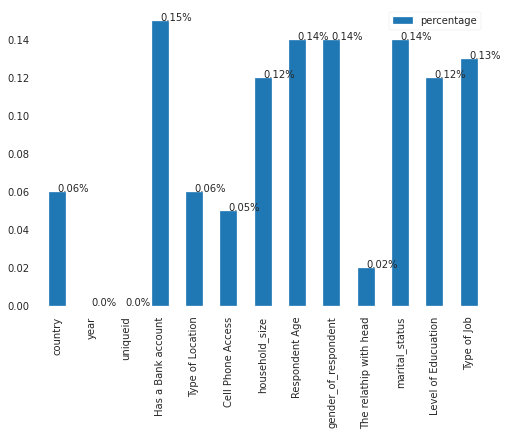

In [82]:
#Visualising our missing values 
barchart = missing_df.plot.bar(y = "percentage")

# For loop is a handy way to add labels to the bars
for index, percentage in enumerate(missing_percentage):
  barchart.text(index, percentage, str(percentage)+ "%")

In [83]:
#Dropping the rows with missing values
f1 = financial.dropna()

#cheking the sum of missing values to ensure that the rows with missing values have been dropped 
f1.isnull().sum()

country                   0
year                      0
uniqueid                  0
Has a Bank account        0
Type of Location          0
Cell Phone Access         0
household_size            0
Respondent Age            0
gender_of_respondent      0
The relathip with head    0
marital_status            0
Level of Educuation       0
Type of Job               0
dtype: int64

#### **CHECKING MY COLUMN DATATYPES**

In [84]:
#Cheking the datatypes in our colums
f1.dtypes

country                    object
year                        int64
uniqueid                   object
Has a Bank account         object
Type of Location           object
Cell Phone Access          object
household_size            float64
Respondent Age            float64
gender_of_respondent       object
The relathip with head     object
marital_status             object
Level of Educuation        object
Type of Job                object
dtype: object

From the above listed datatypes we can see that household is a float we will change it to integer because you cant have for example 1.2 people living in a house and age we will also change it to integer 

In [85]:
#changing the columns to integer as explained above 
f2 = f1.astype({"household_size": "int", "Respondent Age": "int"})

#checking the dtypes of f2 to see if the columns have changes
f2.dtypes

country                   object
year                       int64
uniqueid                  object
Has a Bank account        object
Type of Location          object
Cell Phone Access         object
household_size             int64
Respondent Age             int64
gender_of_respondent      object
The relathip with head    object
marital_status            object
Level of Educuation       object
Type of Job               object
dtype: object

#### **CHECKING AND TAKING CARE OF ANY OUTLIERS IN OUR DATASET**

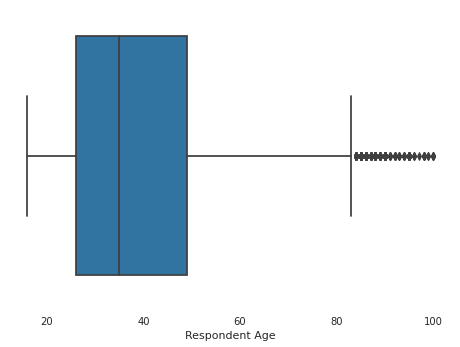

In [86]:
#Visualising outliers in our respondent age column 
sns.boxplot(x=f2['Respondent Age'])

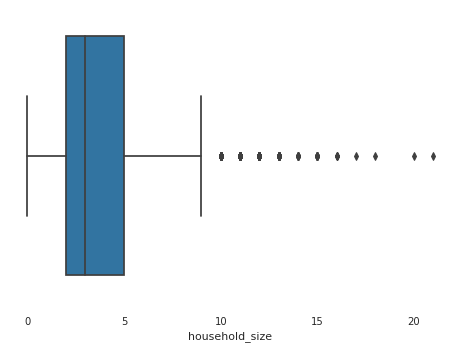

In [87]:
#visulising the outliers in the household_size column 
sns.boxplot(x=f2['household_size'])

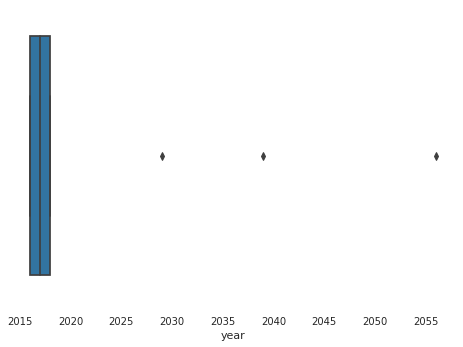

In [88]:
#visualising outliers in the year column 
sns.boxplot(x=f2['year'])

In [89]:
#dropping the outliers in the two columns using IQR 
Q1 = f2.quantile(0.25)
Q3 = f2.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

year               2.0
household_size     3.0
Respondent Age    23.0
dtype: float64


In [90]:
#cheking the shape of our dataset before dropping the outliers
f2.shape

(23343, 13)

In [91]:
#dropping the outliers in the columns of our dataset
f3 = f2[~((f2 < (Q1 - 1.5 * IQR)) |(f2 > (Q3 + 1.5 * IQR))).any(axis=1)]
f3.shape

(22725, 13)

As we can see the shape of our dataset changed, so this means that we dropped any outliers in our dataset, so it safe to say that our dataset is outlier free

#### **ENSURING MY DATASET CONTAIN NO DUPLICATE VALUES**


In [92]:
#checking if my dataset has any duplicates
f3.duplicated().sum()

0

the dataset luckily contains no duplicate entries

## **PERFORMING UNIVARIATE ANALYSIS** 

### **EXPLORATORY ANALYSIS**

In [93]:
# I am going to use an automatic eda to generate a report based on my categrocial and numerical features in the dataset 
# first i am going to check my pandas version
pd.__version__

'1.1.5'

from the above pandas version i may run into a join_axes type error, so i have to update pandas in-order to use the profilreport library 

In [ ]:
#Upgrading my pandas to the latest version
!pip install pandas==1.2.4

Also i need to make sure that my pandas Profilinf is upto date using the below code it will install the latest version of pandas profiling into my environment

In [ ]:
 !pip install pandas-profiling==2.7.1

since the profile report is going to give a report on my whole dataset i need to exclude some columns such as unique id and the index because they will be included and we do not want any statistical explations or measure from them

In [96]:
#cheking my columnn names
f3.columns

Index(['country', 'year', 'uniqueid', 'Has a Bank account', 'Type of Location',
       'Cell Phone Access', 'household_size', 'Respondent Age',
       'gender_of_respondent', 'The relathip with head', 'marital_status',
       'Level of Educuation', 'Type of Job'],
      dtype='object')

#### DROPPING UNNCESSARY COLUMNS

In [215]:
#dropping columns 
f4 = f3.drop(columns = ['uniqueid'])
f4

,country,year,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed
...,...,...,...,...,...,...,...,...,...,...,...,...
23512,Uganda,2018,No,Rural,No,2,57,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23519,Uganda,2018,No,Rural,Yes,4,48,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,No,Rural,Yes,2,27,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,No,Rural,Yes,5,27,Female,Parent,Widowed,Primary education,Other Income


In [98]:
#Automatic EDA Analysis
from pandas_profiling import ProfileReport

prof = ProfileReport(f4)
prof.to_notebook_iframe()
#Creating a html file where you can see the profile report much easier
prof.to_file(output_file='output.html')

Summarize dataset:   0%|          | 0/25 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

#### **EXPLAINING the EDA OF THE UNIVARIATE ANALAYSI**S 


##### **COUNTRY UNIVARIATE ANALYSIS**

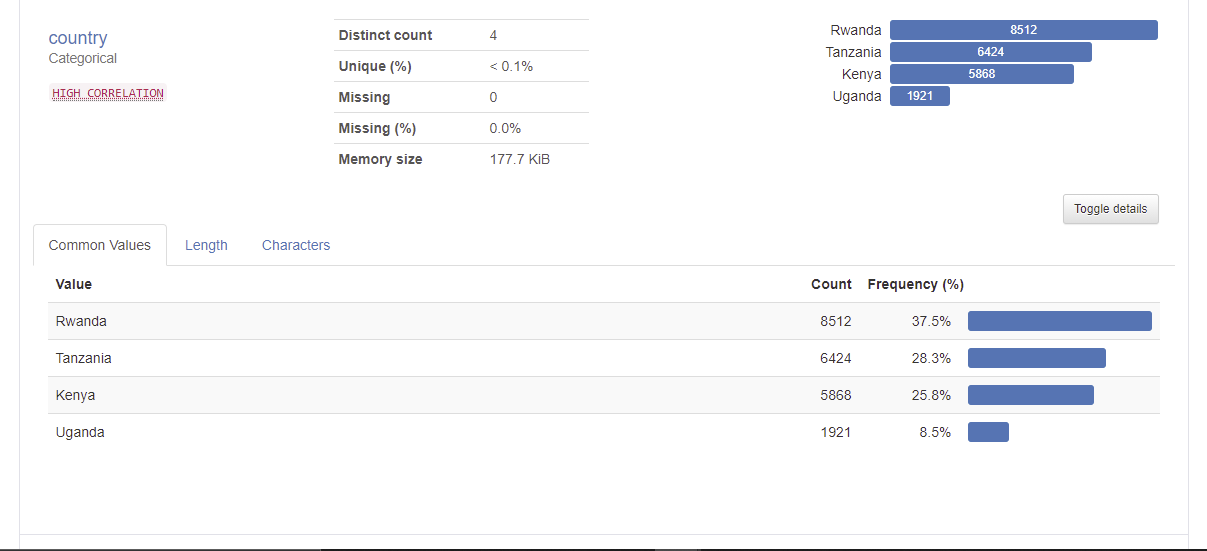

From the profile  [report](https://colab.research.google.com/drive/1azSyLhYw8xB6BfOWM2hztUGSZMhbZAOZ#scrollTo=78Asi8jpaGc7&line=4&uniqifier=1) above if you press the toogle details your bottom left you can see the various stastic analysis, in this case country is a categorical column so using a frequency distribution table will be able to tell you wich country has the highest frequency in the dataset. 

In this case the country with the highest frequency is Rwanda with a frequency of 37.5% and a count of 8512. so Rwanda accounts for around 37.5% of the dataset.

While Tanzania has the least observations or the lowest frequency meaning that There are not many entries of Uganda in our dataset, with a frequency of 8.5%, and a count of 1921

##### **YEAR UNIVARIATE ANALYSIS**


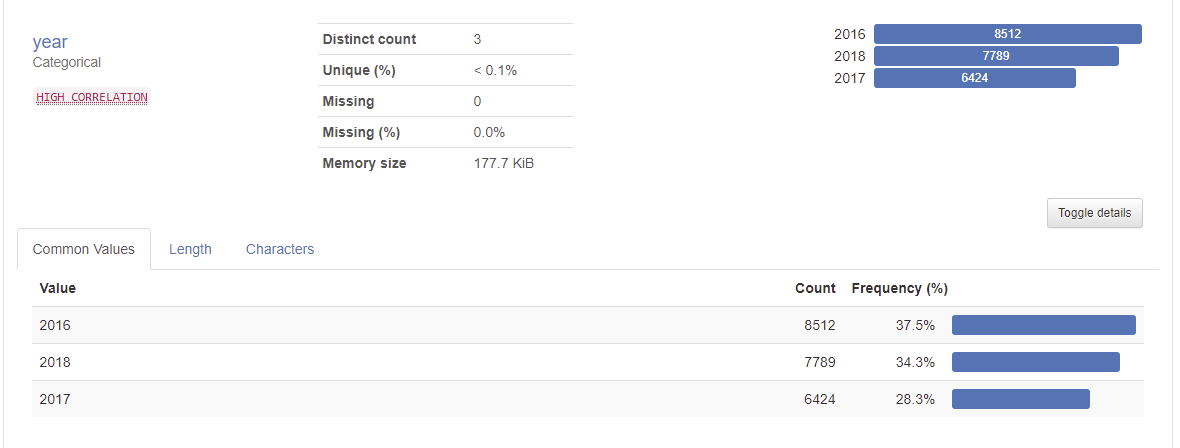


From the Profile [report](https://colab.research.google.com/drive/1azSyLhYw8xB6BfOWM2hztUGSZMhbZAOZ#scrollTo=78Asi8jpaGc7&line=4&uniqifier=1) if you follow the same procedure and toogle the details on the bottom left we can see the frequency distribution table of the years 2016-2018

From the analysis point of view we can easily say that 2016 has the highest frequency which probably correlates to why the Country(Rwanda) has more entries in the dataset.
From the original description of how the dataset is collected we can see that Rwanda was surveyed in 2016 [Dataset survey](https://colab.research.google.com/drive/1azSyLhYw8xB6BfOWM2hztUGSZMhbZAOZ#scrollTo=Wt3kpJ_1lY0X&line=14&uniqifier=1)

##### **HOUSESHOLD SIZE ANLAYSIS**

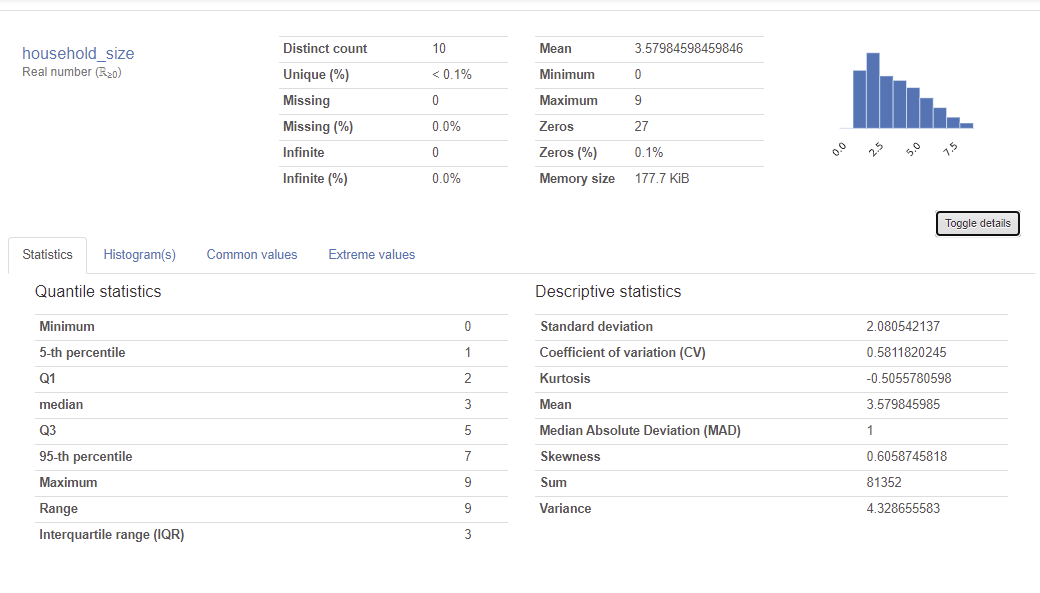

From the profile  [report](https://colab.research.google.com/drive/1azSyLhYw8xB6BfOWM2hztUGSZMhbZAOZ#scrollTo=78Asi8jpaGc7&line=4&uniqifier=1) 
we can see the:

**Mean**

Mean of house hold size is 3.5 so we can round that of to 4, this tells us that on average there are 4 people in a hosue in East Africa

**MAXIMUM ANALYSIS**

We can see that the household size has a maximum of 9, meaning that the largest house hold contains 9 people/individuals

**STANDARD DEVIATION ANALYSIS**

We can also see the Standard deviation above is at 2.08, sd(Standard deviation tell us how spread our data is from the mean), to find if our data is close to the mean we calculate the coefficient of Variation by dividing the sd by the mean

In this case we can see that the cv(Coefficient Variation) = 0.58, a rule of thumb is is the cv < 1, there is a low variation and in this case we can say that there is a low variation in our data, meaning our data points in the household_size is closer to the average

**KURTOSIS**

In this case we can see our Kurtosis is at - 0.5023, we can say that this data has a distribution of flat and thin tail, it is a Platykurtic distribution, in context it is less peaked. The household size has a lower kurtosis than a normal distibution


**SKEWNESS** 

The skewness of the data in this column is 0.6028, we can say that the data is moderatley skewed

**HISTOGRAM**

Below we can see the histogram analysis of the household size 

It is fairly evident that house holds at 2 bin have a high frequency meaning that there are many individuals in this dataset who have 2 people in their housesholds

With the 8 th bin having a lower frequency this tells us that there are few people who have 8 people in their households


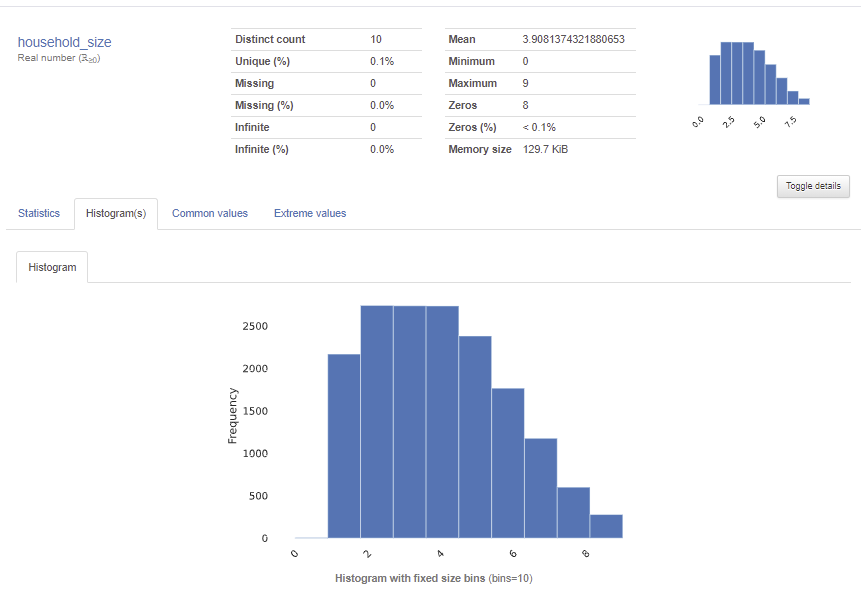



##### **RESPONDEDNT AGE ANALYSIS**

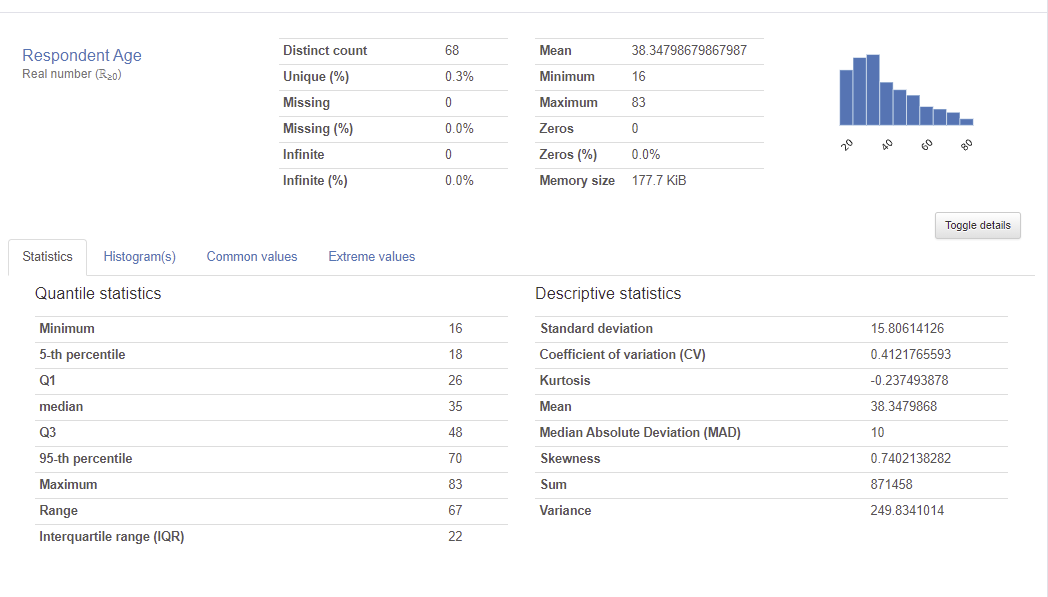

From the profile  [report](https://colab.research.google.com/drive/1azSyLhYw8xB6BfOWM2hztUGSZMhbZAOZ#scrollTo=78Asi8jpaGc7&line=4&uniqifier=1) 
we can see the:

**Mean**

Mean of house hold size is 38, this means in the dataset the average age of individuals is 38

**MINIMUM ANALYSIS** 

We can see that the Respondent Age has a minimum age is 16, meaning that the youngest person is 16 years old  

**MAXIMUM ANALYSIS** 

We can see that the Respondent Age has a maximum of 83, meaning that the oldest person is 83 years old   

**STANDARD DEVIATION ANALYSIS**

We can also see the Standard deviation above is at 15.8, sd(Standard deviation tell us how spread our data is from the mean), to find if our data is close to the mean we calculate the coefficient of Variation by dividing the sd by the mean

In this case we can see that the cv(Coefficient Variation) = 0.41, a rule of thumb is is the cv < 1, there is a low variation and in this case we can say that there is a low variation in our data, meaning our data points in the Respondent Age is closer to the average

**KURTOSIS**

In this case we can see our Kurtosis is at - 0.237, we can say that this data has a distribution of flat and thin tail, it is a Platykurtic distribution, in context it is less peaked. The household size has a lower kurtosis than a normal distibution


**SKEWNESS** 

The skewness of the data in this column is 0.74, we can say that the data is moderately skewed

**HISTOGRAM**

Below we can see the histogram analysis of the Respondent Age

It is fairly evident that ages between 25-30 have a high frequency meaning that there are many individuals in this dataset who are between those ages, we have 70 - 80 having some of the lowest frequencies meaning not many people in this dataset are between those ages

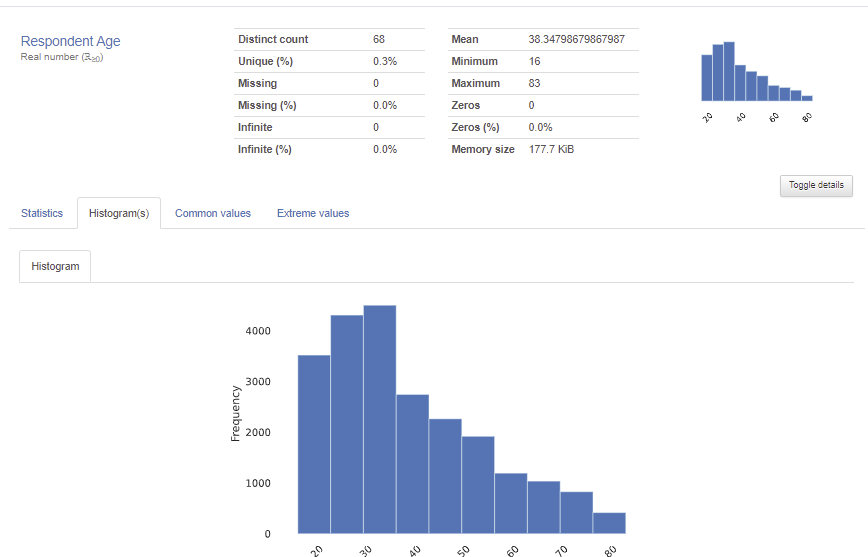


### **PERFORMING BIVARIATE ANALYSIS**

In [99]:
#Listing my columns in my dataset f4
f4.columns

Index(['country', 'year', 'Has a Bank account', 'Type of Location',
       'Cell Phone Access', 'household_size', 'Respondent Age',
       'gender_of_respondent', 'The relathip with head', 'marital_status',
       'Level of Educuation', 'Type of Job'],
      dtype='object')

#### **ANALYSIS BETWEEN NUMERICAL AND NUMERICAL VARIABLES**

scatter plot to show the relationship between 	Respondent Age and household_size 



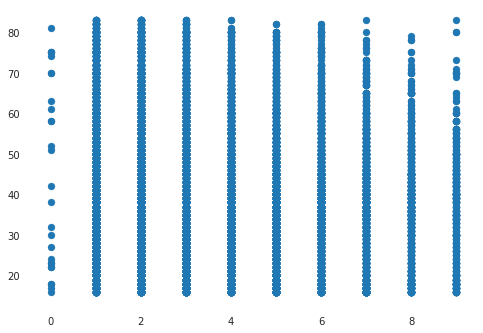

In [100]:
plt.scatter(f4["household_size"], f4["Respondent Age"])
plt.show()

From the above scatter plot there is clearly no relationship between our numerical columns but to be sure we can calculate the pearsons coefficient and if the coefficient is negative it will soldify our findings above 

In [101]:
# Calcluating pearsons coefficient for the above columns 
f4["household_size"].corr(f4["Respondent Age"])

-0.10620882169759871

The coefficient above tells that there is literally no correlation between the numerical columns

##### SHOWING THE CORRELATION BETWEEN MY NUMERICAL COLUMNS

In [102]:
#Showing the correlation between my numerical columns
f4.corr()

,year,household_size,Respondent Age
year,1.000000,-0.096684,-0.023538
household_size,-0.096684,1.000000,-0.106209
Respondent Age,-0.023538,-0.106209,1.000000


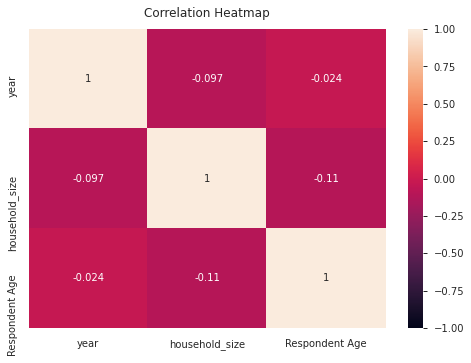

In [103]:
#heatmap tp visualise the correlation above 
heatmap = sns.heatmap(f4.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

Okay so from the above pearsons correlation, my coefficients are not that good with the highest being the correlation between the respondents age and household size, so it safe to assume that in my numerical columns there is absolutly no correlation bettween my values.

#### ANALYSIS BETWEEN CATEGORICAL VARIABLES IN RELATION TO HAVING A BANK ACCOUNT

In [104]:
#splitting my data into the categorical features and putting into a new dataframe
cd = f4.select_dtypes(exclude=[np.number])
cd

,country,Has a Bank account,Type of Location,Cell Phone Access,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,Yes,Rural,Yes,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,No,Rural,No,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,Yes,Urban,Yes,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,No,Rural,Yes,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,No,Urban,No,Male,Child,Single/Never Married,Primary education,Informally employed
...,...,...,...,...,...,...,...,...,...
23512,Uganda,No,Rural,No,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23519,Uganda,No,Rural,Yes,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,No,Rural,Yes,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,No,Rural,Yes,Female,Parent,Widowed,Primary education,Other Income


##### LOOKING AT COUNTRIES AND BANK ACCOUNTS

In [105]:
#Frirst we need to group our data by country and has a bank account
cd2 = cd.groupby(['country','Has a Bank account'])
cd2

In [106]:
#We need to determine the proportion of yes and no in the bank accounts, basically
#we will use the size function to count the number of rows in each grouping
cd2.size()

country   Has a Bank account
Kenya     No                    4377
          Yes                   1491
Rwanda    No                    7532
          Yes                    980
Tanzania  No                    5826
          Yes                    598
Uganda    No                    1755
          Yes                    166
dtype: int64

In [107]:
# We will then use the unstack methodtop convert the results into a more readable format and
# proceed to store it in a new variable
cd3 = cd2.size().unstack()
cd3

Has a Bank account,No,Yes
country,,
Kenya,4377,1491
Rwanda,7532,980
Tanzania,5826,598
Uganda,1755,166


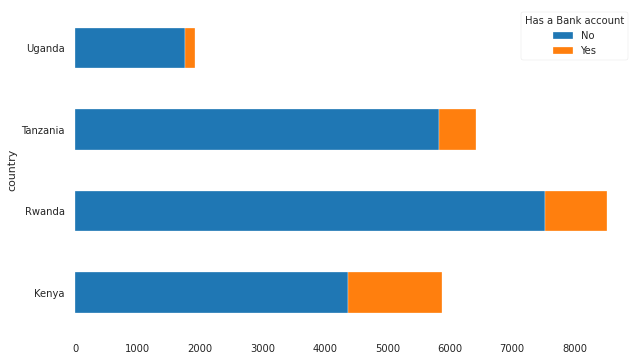

In [108]:
# We will then plot a tacked column chart to display our results of yes and no in the two categroical variables
cd3.plot(kind='barh', stacked=True, figsize=[10,6])

###### Countries and bank account overview

From the stacked column chart above we can see that Rwanda is the country with the highest indviduals without Bank Accounts, and Kenya is the country with the highest number of individuals with bank accounts, so at this stage we can't really tell whether there are other factors that could be affecting Rwanda it could be the location or education etc, we can check the loaction and countries there could be a relationship with where indivduals stay

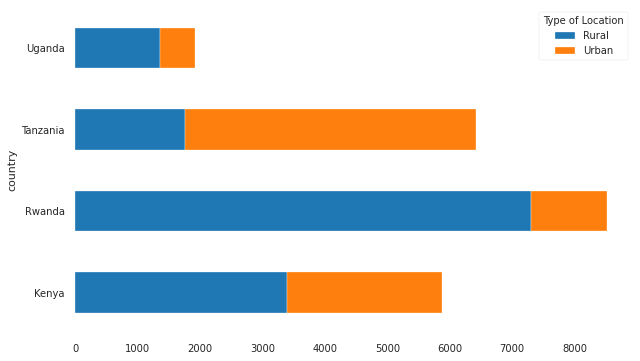

In [109]:
# cheking the country and location stack column chart 
cd2 = cd.groupby(['country','Type of Location'])
cd2
cd2.size()
cd3 = cd2.size().unstack()
cd3
cd3.plot(kind='barh', stacked=True, figsize=[10,6])

###### Final overview of the analysis

So we can see that Rwanda has the highest rural location compared to other countries, becuase we know that in rural areas it might be hard to access certain services such as bank services, thsi could be one of the reasons why there are so many individuals without bank accounts

On the other hand we can see that Tanzania has the highest urban settlement, but not many people have a bank account, Kenya is following with a high number of urban loaction which could in-tern explain the high number of people with bank accounts 

Note:

There are more factors which could lead to the reason why Kenya has the highest Number of indviduals or why Rwanda has the highest number of individuals without bank accounts, making a chi-squared test may help find the correlation between these categorical variables

##### LOOKING AT TYPE OF LOCATION AND HAS A BANK ACCOUNT

In [110]:
#Frirst we need to group our data by Type of Location and has a bank account
toa = cd.groupby(['Type of Location','Has a Bank account'])
toa

In [111]:
#We need to determine the proportion of yes and no in the Type of Location, basically
#we will use the size function to count the number of rows in each grouping
toa.size()

Type of Location  Has a Bank account
Rural             No                    12195
                  Yes                    1615
Urban             No                     7295
                  Yes                    1620
dtype: int64

In [112]:
# We will then use the unstack methodtop convert the results into a more readable format and
# proceed to store it in a new variable
toa1 = toa.size().unstack()
toa1

Has a Bank account,No,Yes
Type of Location,,
Rural,12195,1615
Urban,7295,1620


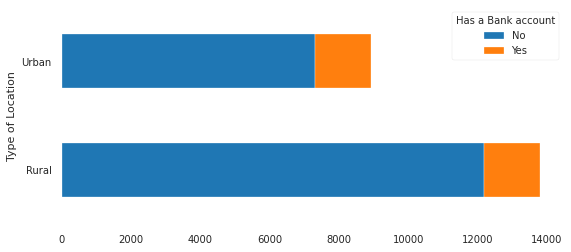

In [113]:
# We will then plot a tacked column chart to display our results of yes and no in the two categroical variables
toa1.plot(kind='barh', stacked=True, figsize=[9,4])

###### Overview of loacation in General and Bank Account

From the above stacked column chart we can see that Rural regions have the highest number of individuals without Bank accounts comapres to urban regions, but the most intresting thing is that the number of individuals that have bank accounts between the two regions is not a big gap, from the [unstack](https://) section above we can see there is a difference of  5 individuals

##### LOOKING AT CELL PHONE ACESS AND HAS A BANK ACCOUNT

In [114]:
#Frirst we need to group our data by Cell Phone Access and has a bank account
ca = cd.groupby(['Cell Phone Access', 'Has a Bank account'])
ca

In [115]:
#We need to determine the proportion of yes and no in the Cell Phone Access, basically
#we will use the size function to count the number of rows in each grouping
ca.size()

Cell Phone Access  Has a Bank account
No                 No                     5647
                   Yes                      93
Yes                No                    13843
                   Yes                    3142
dtype: int64

In [116]:
# We will then use the unstack methodtop convert the results into a more readable format and
# proceed to store it in a new variable
ca1 = ca.size().unstack()
ca1

Has a Bank account,No,Yes
Cell Phone Access,,
No,5647,93
Yes,13843,3142


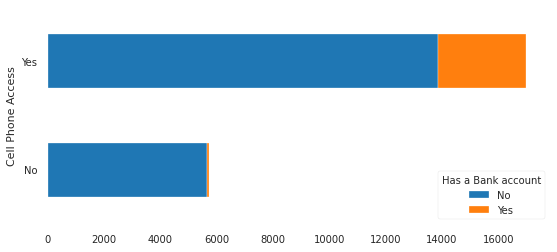

In [117]:
# We will then plot a tacked column chart to display our results of yes and no in the two categroical variables
ca1.plot(kind='barh', stacked=True, figsize=[9,4])

###### Overview of the cell phone acess and bank account

From the stacked column chart above we can see that people with cellphone acess do not have bank accounts compared to those without, this could be because of the sample size meaning that there was a grater number of people who had cellphones comapred to those who did not resulting in the above observation.

Repeat the experiment to get current data, or get a less baised sample 

##### LOOKING AT GENDER AND HAS BANK ACCOUNT

In [118]:
#Frirst we need to group our data by gender_of_respondent and has a bank account
ge = cd.groupby(['gender_of_respondent', 'Has a Bank account'])
ge

In [119]:
#We need to determine the proportion of yes and no in the gender_of_respondent, basically
#we will use the size function to count the number of rows in each grouping
ge.size()

gender_of_respondent  Has a Bank account
Female                No                    11944
                      Yes                    1453
Male                  No                     7546
                      Yes                    1782
dtype: int64

In [120]:
# We will then use the unstack methodtop convert the results into a more readable format and
# proceed to store it in a new variable
ge1 = ge.size().unstack()
ge1

Has a Bank account,No,Yes
gender_of_respondent,,
Female,11944,1453
Male,7546,1782


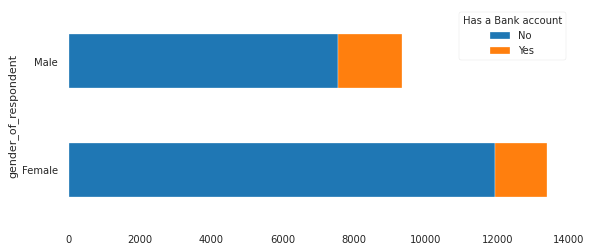

In [121]:
# We will then plot a tacked column chart to display our results of yes and no in the two categroical variables
ge1.plot(kind='barh', stacked=True, figsize=[9,4])

###### Gender anaysis overview

From the stacked column chart we can see that there is quite a number of female individuals without bank accounts, but on the other hand there more males with bank accounts than females, so this tells us two things that could be affecting the above chart

1) socioeconomic factors - African countries are greatly affected with this, somme of this countries could not be educating the girl child compared to the boy child but we would need more data to explain this

2) The survey that was conducted may have had more female individuals compared to Male individuals which could be the reason for the observed chart above

######  Trying to prove the factors listed above 


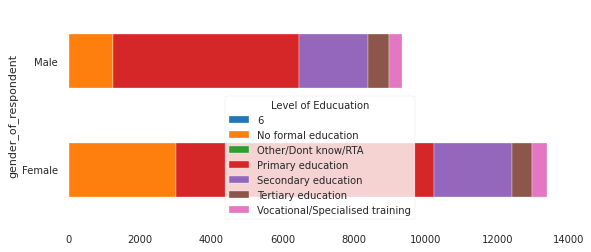

In [122]:
gl = cd.groupby(['gender_of_respondent', 'Level of Educuation'])
gl.size()
gl1 = gl.size().unstack()
gl1.plot(kind='barh', stacked=True, figsize=[9,4])

In [123]:
cd["gender_of_respondent"].value_counts()

Female    13397
Male       9328
Name: gender_of_respondent, dtype: int64

###### Final anlaysis of factors

We can see above that there were more females without formal education, this could result as one of the reasons as to why there are more female individuals without bank accounts

We can also see that there were more Female Entries comapred to Males so that too can cause the difference in the stacked column chart

##### LOOKING AT THE REALATIONSHIP WITH THE HEAD AND HAS A BANK ACCOUNT

In [124]:
#Frirst we need to group our data by The relathip with head and has a bank account
re = cd.groupby(['The relathip with head', 'Has a Bank account'])
re

In [125]:
#We need to determine the proportion of yes and no in the The relathip with head, basically
#we will use the size function to count the number of rows in each grouping
re.size()

The relathip with head  Has a Bank account
Child                   No                     1946
                        Yes                     185
Head of Household       No                    10181
                        Yes                    2221
Other non-relatives     No                      161
                        Yes                      19
Other relative          No                      576
                        Yes                      64
Parent                  No                      953
                        Yes                      58
Spouse                  No                     5673
                        Yes                     688
dtype: int64

In [126]:
# We will then use the unstack methodtop convert the results into a more readable format and
# proceed to store it in a new variable
re1 = re.size().unstack()
re1

Has a Bank account,No,Yes
The relathip with head,,
Child,1946,185
Head of Household,10181,2221
Other non-relatives,161,19
Other relative,576,64
Parent,953,58
Spouse,5673,688


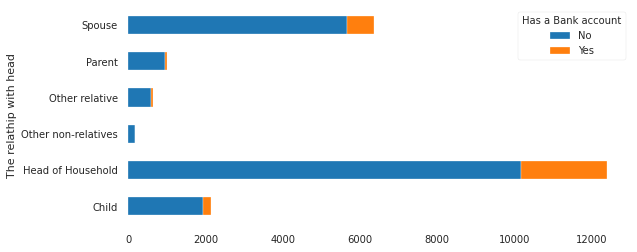

In [127]:
# We will then plot a tacked column chart to display our results of yes and no in the two categroical variables
re1.plot(kind='barh', stacked=True, figsize=[9,4])

###### Analysis overview of the relathip with the head and the bank account

From the stacked column chart above we can see that the head of the household had more indviduals without bank accounts, but it is also the one with the most individuals with bank accounts

##### LOOKING AT THE REALATIONSHIP WITH MARITAL STATUS AND HAS A BANK ACCOUNT



In [128]:
#Frirst we need to group our data by marital_status and has a bank account
ms = cd.groupby(['marital_status', 'Has a Bank account'])
ms

In [129]:
#We need to determine the proportion of yes and no in the marital_status, basically
#we will use the size function to count the number of rows in each grouping
ms.size()

marital_status           Has a Bank account
Divorced/Seperated       No                    1799
                         Yes                    230
Dont know                No                       6
                         Yes                      2
Married/Living together  No                    8604
                         Yes                   1827
Single/Never Married     No                    6802
                         Yes                    946
Widowed                  No                    2279
                         Yes                    230
dtype: int64

In [130]:
# We will then use the unstack methodtop convert the results into a more readable format and
# proceed to store it in a new variable
ms1 = ms.size().unstack()
ms1

Has a Bank account,No,Yes
marital_status,,
Divorced/Seperated,1799,230
Dont know,6,2
Married/Living together,8604,1827
Single/Never Married,6802,946
Widowed,2279,230


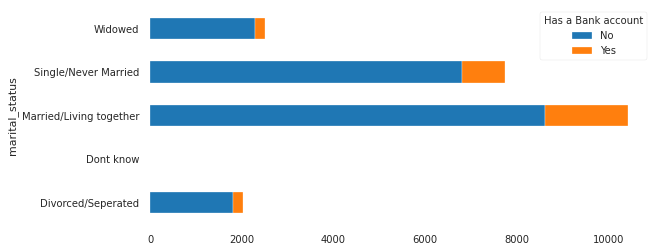

In [131]:
# We will then plot a tacked column chart to display our results of yes and no in the two categroical variables
ms1.plot(kind='barh', stacked=True, figsize=[9,4])

###### Analysis overview of the relationship with marital status and the bank account

From the stacked column chart we can see that indviduals who are married and live together seem to be the ones with the ni bank accounts comapred to other columns, and they are also the ones with the highest number with bank accounts

##### LOOKING AT THE REALATIONSHIP WITH LEVEL OF EDUCATION AND HAS A BANK ACCOUNT



In [132]:
#Frirst we need to group our data by Level of Educuation and has a bank account
loe = cd.groupby(['Level of Educuation', 'Has a Bank account'])
loe

In [133]:
#We need to determine the proportion of yes and no in the marital_status, basically
#we will use the size function to count the number of rows in each grouping
loe.size()

Level of Educuation              Has a Bank account
6                                No                       20
                                 Yes                       5
No formal education              No                     4071
                                 Yes                     161
Other/Dont know/RTA              Yes                       6
Primary education                No                    11382
                                 Yes                    1061
Secondary education              No                     3132
                                 Yes                     968
Tertiary education               No                      550
                                 Yes                     584
Vocational/Specialised training  No                      335
                                 Yes                     450
dtype: int64

In [134]:
# We will then use the unstack methodtop convert the results into a more readable format and
# proceed to store it in a new variable
loe1 = loe.size().unstack()
loe1

Has a Bank account,No,Yes
Level of Educuation,,
6,20.0,5.0
No formal education,4071.0,161.0
Other/Dont know/RTA,NaN,6.0
Primary education,11382.0,1061.0
Secondary education,3132.0,968.0
Tertiary education,550.0,584.0
Vocational/Specialised training,335.0,450.0


In [135]:
# as you can see above we have encountered a null valau in the Other/Dont know/RTA no section so this could mean that there were no people in this row that do not have a back account
# we wont drop as it may drop the yes column
loe1.isnull().sum()

Has a Bank account
No     1
Yes    0
dtype: int64

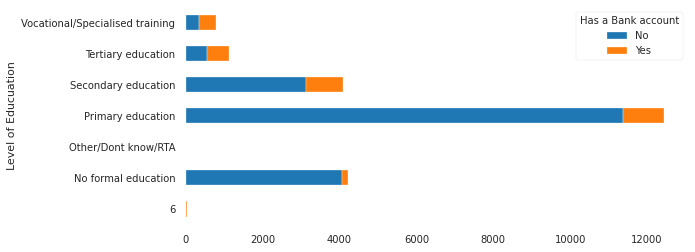

In [136]:
# We will then plot a tacked column chart to display our results of yes and no in the two categroical variables
loe1.plot(kind='barh', stacked=True, figsize=[9,4])

###### Analysis overview of level of education and bank account

From the stacked column we can see that individuals who reached a primamry level are the ones with the highest number of people with no bank accounts compare to other columns, and also the ones with the highest number of people who have a bank account

##### LOOKING AT THE REALATIONSHIP WITH TYPE OF JOB AND HAS A BANK ACCOUNT



In [137]:
#Frirst we need to group our data by Type of Job and has a bank account
typ = cd.groupby(['Type of Job', 'Has a Bank account'])
typ

In [138]:
#We need to determine the proportion of yes and no in the marital_status, basically
#we will use the size function to count the number of rows in each grouping
typ.size()

Type of Job                   Has a Bank account
Dont Know/Refuse to answer    No                     104
                              Yes                     14
Farming and Fishing           No                    4676
                              Yes                    620
Formally employed Government  No                      85
                              Yes                    297
Formally employed Private     No                     471
                              Yes                    564
Government Dependent          No                     168
                              Yes                     41
Informally employed           No                    5052
                              Yes                    438
No Income                     No                     572
                              Yes                     13
Other Income                  No                     843
                              Yes                    183
Remittance Dependent          No       

In [139]:
# We will then use the unstack methodtop convert the results into a more readable format and
# proceed to store it in a new variable
typ1 = typ.size().unstack()
typ1

Has a Bank account,No,Yes
Type of Job,,
Dont Know/Refuse to answer,104,14
Farming and Fishing,4676,620
Formally employed Government,85,297
Formally employed Private,471,564
Government Dependent,168,41
Informally employed,5052,438
No Income,572,13
Other Income,843,183
Remittance Dependent,2145,230


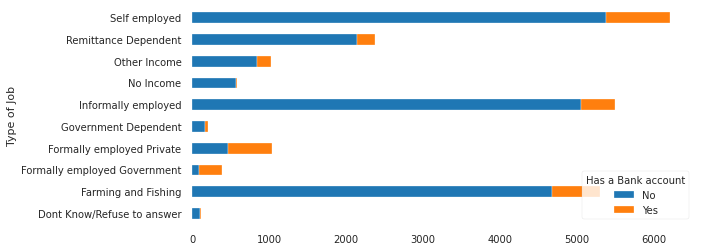

In [140]:
# We will then plot a tacked column chart to display our results of yes and no in the two categroical variables
typ1.plot(kind='barh', stacked=True, figsize=[9,4])

###### Analysis overview of work and bank account

From the stacked column chart we see that individuals who are self employed have the highest number of people who do not have a bank accountm, and also the one with the highest number of people with bank accounts

## MULTIVARIATE ANALYSIS

### CHECKING MY COLUMN NAMES AND PERFORMING DATA PREPROCESING

In [216]:
f4.columns

Index(['country', 'year', 'Has a Bank account', 'Type of Location',
       'Cell Phone Access', 'household_size', 'Respondent Age',
       'gender_of_respondent', 'The relathip with head', 'marital_status',
       'Level of Educuation', 'Type of Job'],
      dtype='object')

In [230]:
# encoding my categrocial variable that have more than 3 features in their columns 
#categorical_variables = ['The relathip with head', 'marital_status', 'Level of Educuation', 'Type of Job']

#for variable in categorical_variables:
#  f4[variable].fillna("Missing", inplace=True) 
#  dummies = pd.get_dummies(f4[variable], prefix=variable) 
#  f4 = pd.concat([f4, dummies], axis=1) 
#  f4.drop([variable], axis=1, inplace=True) 
#f4.head()

### ENCODING MY COLUMNS 

In [223]:
# Finding out the all the features with type object
ty = f4.select_dtypes(include = "object").columns
print (ty)

Index(['country', 'Has a Bank account', 'Type of Location',
       'Cell Phone Access', 'gender_of_respondent', 'The relathip with head',
       'marital_status', 'Level of Educuation', 'Type of Job'],
      dtype='object')


In [224]:
# now converting typ into numeric type using label encoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

#Using a for loop to iterate through my ty and encoding them
for feat in ty:
    f4[feat] = le.fit_transform(f4[feat].astype(str))
f4

,country,year,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,0,2018,1,0,1,3,24,0,5,2,4,9
1,0,2018,0,0,0,5,70,0,1,4,1,4
2,0,2018,1,1,1,5,26,1,3,3,6,9
3,0,2018,0,0,1,5,34,0,1,2,3,3
4,0,2018,0,1,0,8,26,1,0,3,3,5
...,...,...,...,...,...,...,...,...,...,...,...,...
23512,3,2018,0,0,0,2,57,0,1,0,1,7
23519,3,2018,0,0,1,4,48,0,1,0,1,7
23520,3,2018,0,0,1,2,27,0,1,3,4,7
23521,3,2018,0,0,1,5,27,0,4,4,3,7


In [225]:
# Moving has a bank account as the last column because that is what we will be predicting
mid = f4["Has a Bank account"]
f4.drop(labels=["Has a Bank account"], axis=1, inplace = True)
f4.insert(11, "Has a Bank account", mid)
f4

,country,year,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job,Has a Bank account
0,0,2018,0,1,3,24,0,5,2,4,9,1
1,0,2018,0,0,5,70,0,1,4,1,4,0
2,0,2018,1,1,5,26,1,3,3,6,9,1
3,0,2018,0,1,5,34,0,1,2,3,3,0
4,0,2018,1,0,8,26,1,0,3,3,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...
23512,3,2018,0,0,2,57,0,1,0,1,7,0
23519,3,2018,0,1,4,48,0,1,0,1,7,0
23520,3,2018,0,1,2,27,0,1,3,4,7,0
23521,3,2018,0,1,5,27,0,4,4,3,7,0


### CHECKING FOR MULTICOLLINEARITY IN OUR DATASET 

Multicollinearity can be a problem in a regression model because we would not be able to distinguish between the individual effects of the independent variables on the dependent variable. For example, let’s assume that in the following linear equation:

Y = W0+W1*X1+W2*X2

Coefficient W1 is the increase in Y for a unit increase in X1 while keeping X2 constant. But since X1 and X2 are highly correlated, changes in X1 would also cause changes in X2 and we would not be able to see their individual effect on Y.

Inaccurate use of dummy variables can also cause a multicollinearity problem. This is called the Dummy variable trap:



In [226]:
# VIF (Variable Inflation Factors)
# VIF score of an independent variable represents how well the variable is explained by other independent variables.

from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [240]:
f5 = f4.iloc[:, :-1]
calc_vif(f5)

,variables,VIF
0,country,3.327946
1,year,45.312171
2,Type of Location,2.066052
3,Cell Phone Access,4.432794
4,household_size,4.668695
5,Respondent Age,8.427582
6,gender_of_respondent,2.325201
7,The relathip with head,3.360957
8,marital_status,7.485614
9,Level of Educuation,9.052221


From the above VIF test year, Respondent Age, marital_status and Level of Educuation has a very high multicollinearity, so i will drop them and see how it affects the other variables

In [241]:
f5= f4.drop(['year','Respondent Age', 'Level of Educuation', 'marital_status'],axis=1)
calc_vif(X.iloc[:, :-1])

,variables,VIF
0,country,3.103814
1,Type of Location,1.972193
2,Cell Phone Access,3.260975
3,household_size,3.410863
4,gender_of_respondent,2.019090
5,The relathip with head,2.842519
6,Type of Job,4.635991


From the above overview the reason of dropping those columns with high multicollinearity is to avoid the dummy variable trap and also not to have to many features in my training set as this might reduce acuraccy if the model was trainined in another set, in-other words i wanted to also try oreventing overfitting my model

### LDA ANALYSIS 

In [290]:
#Separating our dataset into the matrix of features x and the dv
x = f5.iloc[:, :-1].values
y = f5.iloc[:, -1].values

In [291]:
# separating my data into the training test and the test set 
# splitting the test size to contain 20% of observations this means the training set will have 80 %
# the training set should always have more observations to eliminate leakage of information to the test set
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [292]:
# Conducting Feature scaling
# feature scaling scales the data using the same scale so this means i need to use the same scale
# in the training test and the test set so i won call the fit_transform method in the test set 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
print(x_train, x_test)

[[ 0.87642222  1.24246716 -1.71644076 ... -0.84095336  1.4683572
   1.15881153]
 [ 0.87642222  1.24246716 -1.71644076 ... -0.84095336  1.4683572
   1.15881153]
 [ 1.96536126 -0.80485025 -1.71644076 ... -0.84095336 -1.17071409
   1.15881153]
 ...
 [-0.21251682  1.24246716  0.58260094 ...  1.18912659 -0.64289983
  -1.10446167]
 [-0.21251682 -0.80485025 -1.71644076 ...  1.18912659  0.94054294
  -0.13448744]
 [-1.30145585 -0.80485025  0.58260094 ...  1.18912659 -1.17071409
  -1.42778641]] [[-0.21251682 -0.80485025  0.58260094 ... -0.84095336  1.4683572
  -1.42778641]
 [-0.21251682 -0.80485025  0.58260094 ...  1.18912659 -0.64289983
  -1.42778641]
 [ 0.87642222  1.24246716 -1.71644076 ... -0.84095336 -0.64289983
   1.15881153]
 ...
 [-0.21251682 -0.80485025  0.58260094 ...  1.18912659 -1.17071409
  -1.42778641]
 [-0.21251682 -0.80485025 -1.71644076 ...  1.18912659 -0.64289983
  -0.13448744]
 [-1.30145585 -0.80485025  0.58260094 ...  1.18912659 -0.64289983
  -1.42778641]]


In [ ]:
# Performing LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components = 2)
x_train = lda.fit_transform(x_train, y_train)
x_test = lda.transform(x_test)

In [294]:
# # Training the RANDOM CLASSIFICATION model on the Training set
from sklearn.ensemble import RandomForestClassifier
# changing the crieterion to entropy to measure the quality of the model, the number of estimator for the number of trees 
cl = RandomForestClassifier(n_estimators = 10, random_state = 0, criterion="entropy")
cl.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [295]:
# Making the Confusion Matrix and the prediction
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = cl.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))

[[3747  149]
 [ 454  195]]
0.8673267326732673
